In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# **Exploring Data**

In [95]:
df = pd.read_csv(r"C:\Users\tanuj\OneDrive\Desktop\Deep Learning\Practice\Big_Mart_Sales_Prediction\train_v9rqX0R.csv")

In [96]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [98]:
df.shape

(8523, 12)

In [99]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [101]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [102]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [103]:
df.duplicated().sum()

0

In [58]:
df['Item_Outlet_Sales'] = round(df['Item_Outlet_Sales'],2)

In [60]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [61]:
df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7509,FDT40,NaN,Low Fat,0.095331,Frozen Foods,125.5678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.36


# **Feature Engneering**

**Filling the Missing Values**

In [108]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

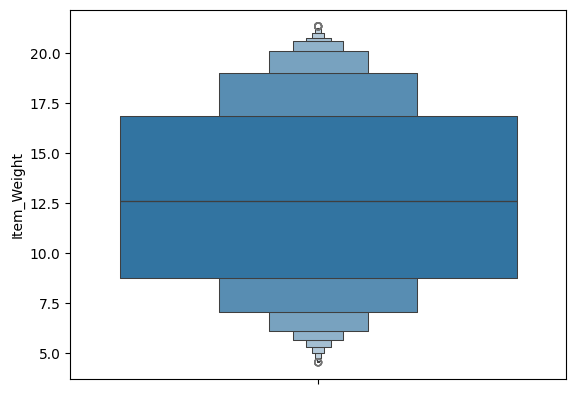

In [ ]:
# Checking Outliars
sns.boxenplot(df["Item_Weight"])
plt.show()

In [106]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [109]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [121]:
object_columns = df.select_dtypes("object").columns.to_list()
for i in object_columns:
    print(df[i].value_counts())
    print("*"*40)

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
****************************************
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
****************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
****************************************
Outlet_Identifier
OUT027    935
OUT013    932
OUT0

In [132]:
d = {'low fat':'LF','Low Fat':'LF','Regular':'R','reg':'R'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].map(d)

In [133]:
df.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,LF,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,R,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,LF,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,R,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,LF,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,LF,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,R,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,LF,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,R,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [135]:
# Mapping
# Outlet_Size
d2 = {'Small':1,'Medium':2,'High':3}

df['Outlet_Size'] = df['Outlet_Size'].map(d2)

# Outlet_Location_Type
d3 = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map(d3)

In [137]:
# ----- One Hot encoding ------
# 2. Item_Fat_Content
df = pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Type','Outlet_Identifier'],drop_first=True,dtype='int')

In [138]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_R,Item_Type_Breads,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0.016047,249.8092,1999,2,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,2009,2,3,443.4228,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2,1,2097.2700,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,1998,2,3,732.3800,1,0,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,1987,3,3,994.7052,0,0,...,0,1,0,0,0,0,0,0,0,0


In [140]:
df.drop(columns="Item_Identifier",inplace=True)

In [141]:
X = df.drop(columns = "Item_Outlet_Sales")
y = df['Item_Outlet_Sales']

**Feature Selection**

In [143]:
imp = mutual_info_regression(X,y)
important_df = pd.DataFrame(imp, columns=["Score"],index=X.columns)
important_df.sort_values(by="Score",ascending=False)

,Score
Item_MRP,0.763110
Outlet_Establishment_Year,0.158226
Outlet_Identifier_OUT019,0.092434
Outlet_Type_Supermarket Type1,0.089609
Item_Visibility,0.084292
Item_Weight,0.074105
Outlet_Identifier_OUT027,0.045794
Outlet_Type_Supermarket Type3,0.041333
Outlet_Location_Type,0.040423
Item_Fat_Content_R,0.024289


# **EDA**

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


**Univariate Analysis**

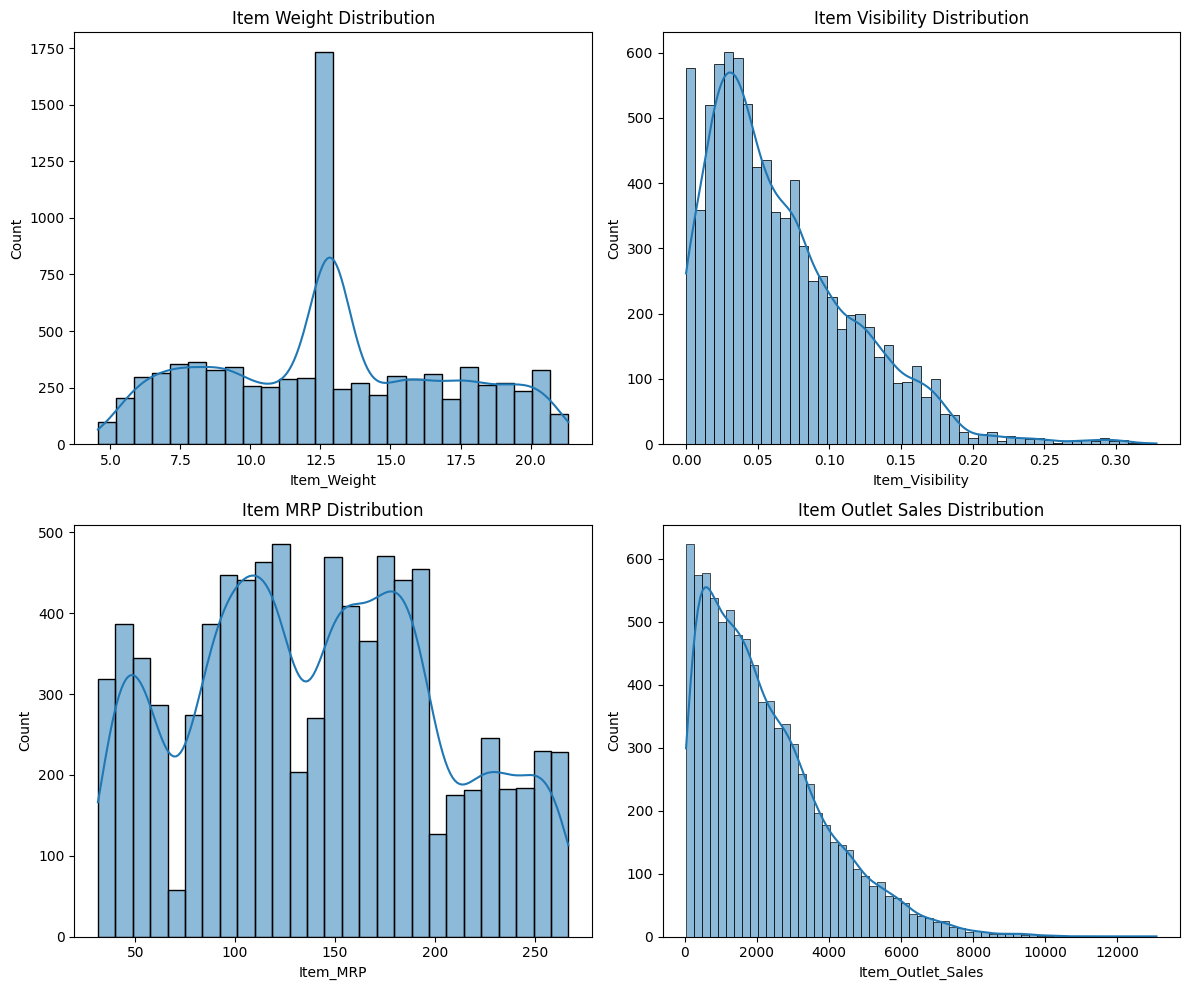

In [111]:
# "Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribution plots
sns.histplot(df["Item_Weight"], kde=True, ax=axes[0, 0]).set_title("Item Weight Distribution")
sns.histplot(df["Item_Visibility"], kde=True, ax=axes[0, 1]).set_title("Item Visibility Distribution")
sns.histplot(df["Item_MRP"], kde=True, ax=axes[1, 0]).set_title("Item MRP Distribution")
sns.histplot(df["Item_Outlet_Sales"], kde=True, ax=axes[1, 1]).set_title("Item Outlet Sales Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

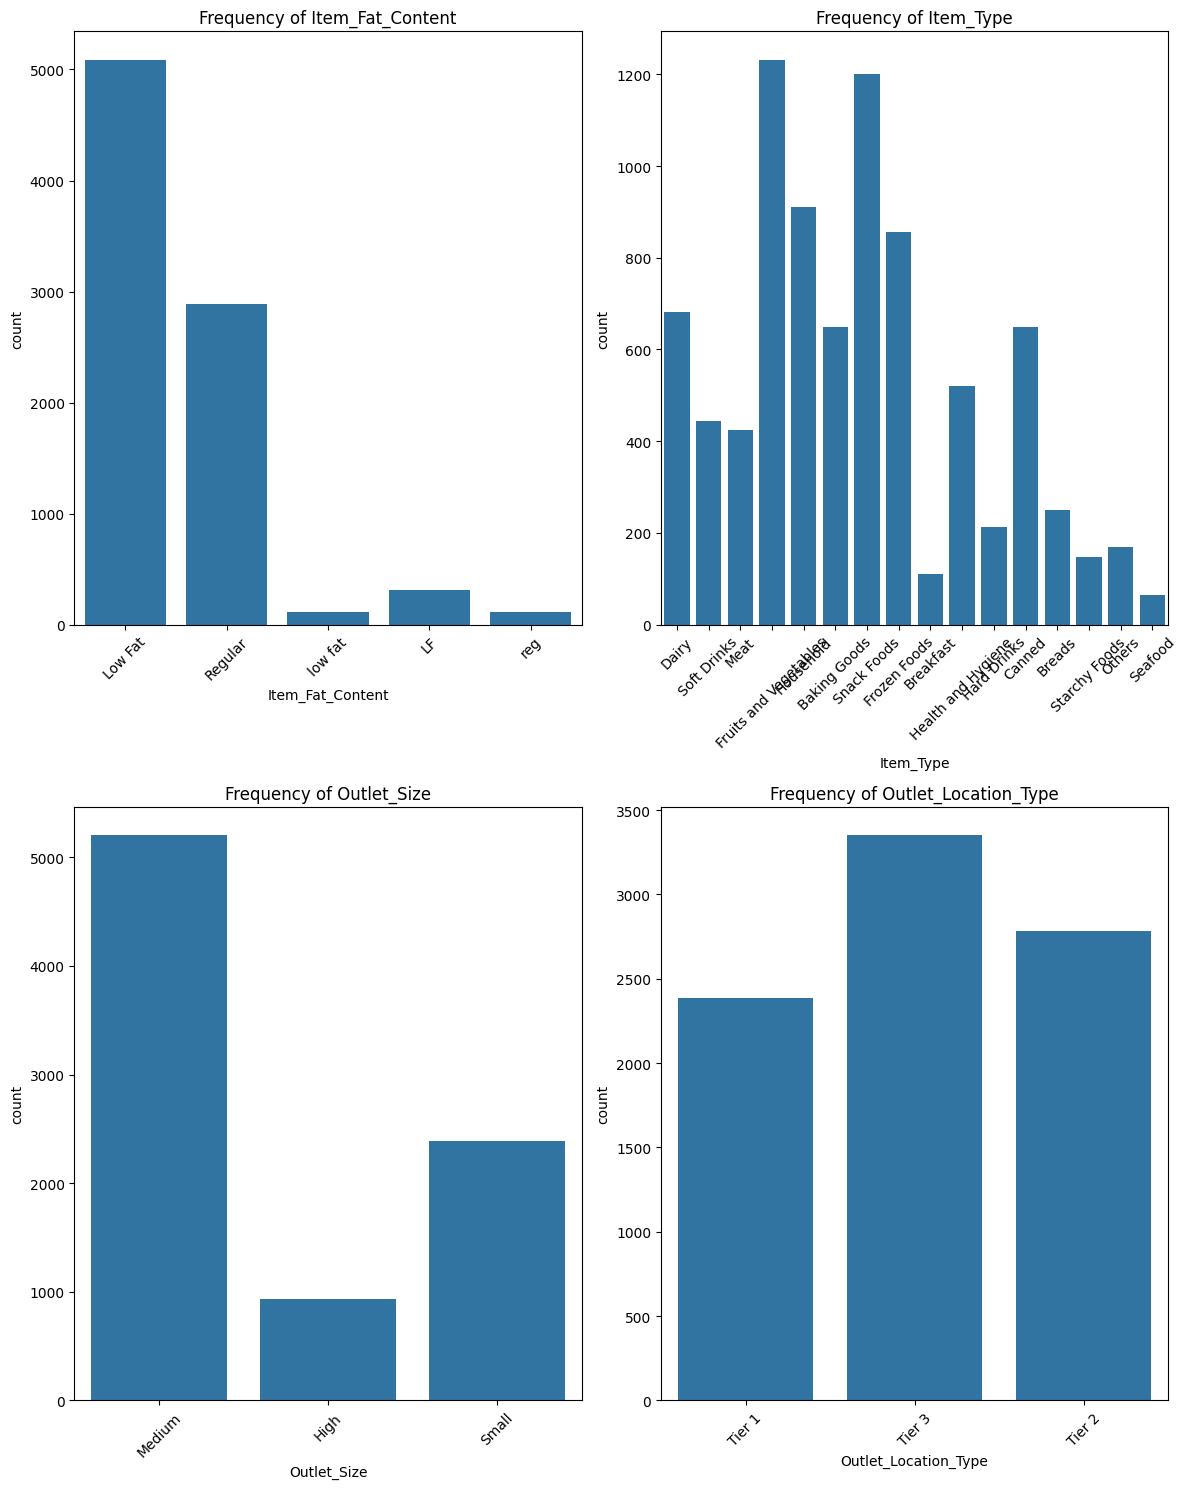

In [115]:
# Create a new figure for bar plots
fig, axes = plt.subplots(2, 2, figsize=(12, 15))
categorical_columns = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type"]

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Frequency of {col}")
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Bivariate Analysis**

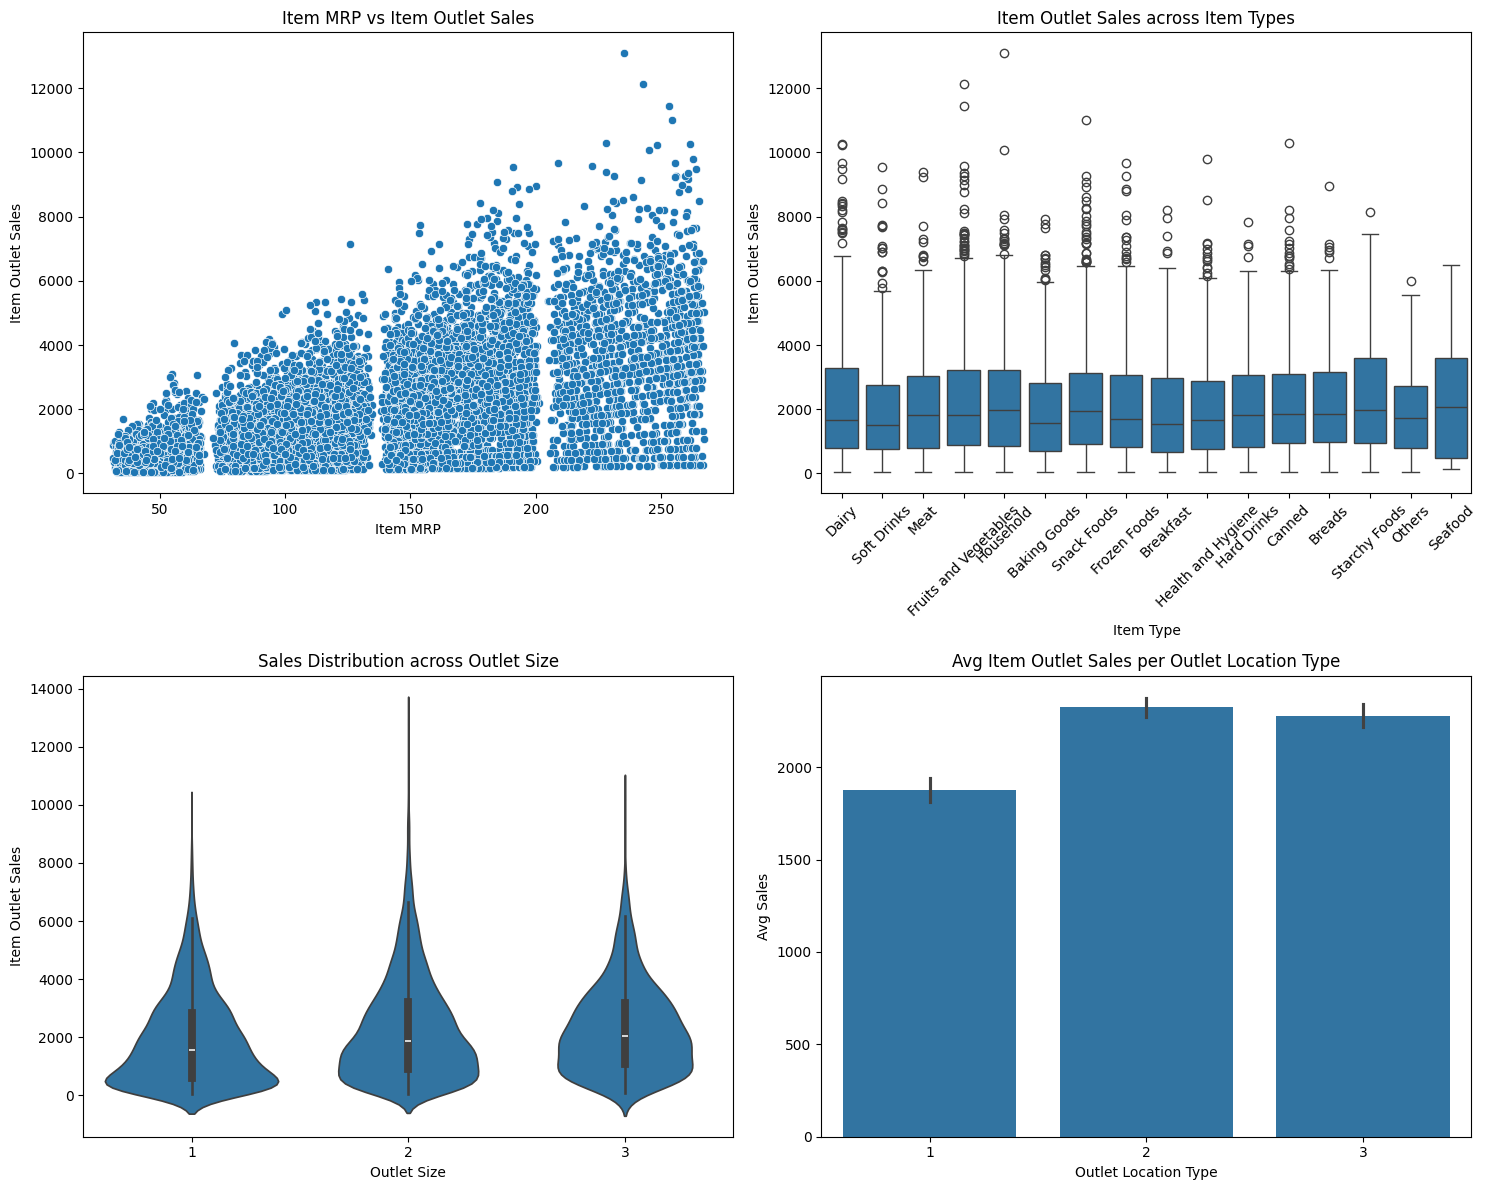

In [136]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter Plot: Item MRP vs Item Outlet Sales
sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales", ax=axes[0, 0])
axes[0, 0].set_title("Item MRP vs Item Outlet Sales")
axes[0, 0].set_xlabel("Item MRP")
axes[0, 0].set_ylabel("Item Outlet Sales")

# Box Plot: Item Type vs Item Outlet Sales
sns.boxplot(data=df, x="Item_Type", y="Item_Outlet_Sales", ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_title("Item Outlet Sales across Item Types")
axes[0, 1].set_xlabel("Item Type")
axes[0, 1].set_ylabel("Item Outlet Sales")

# Violin Plot: Outlet Size vs Item Outlet Sales
sns.violinplot(data=df, x="Outlet_Size", y="Item_Outlet_Sales", ax=axes[1, 0])
axes[1, 0].set_title("Sales Distribution across Outlet Size")
axes[1, 0].set_xlabel("Outlet Size")
axes[1, 0].set_ylabel("Item Outlet Sales")

# Bar Plot: Average Item Outlet Sales per Outlet Location Type
sns.barplot(data=df, x="Outlet_Location_Type", y="Item_Outlet_Sales", estimator=np.mean, ax=axes[1, 1])
axes[1, 1].set_title("Avg Item Outlet Sales per Outlet Location Type")
axes[1, 1].set_xlabel("Outlet Location Type")
axes[1, 1].set_ylabel("Avg Sales")

# Adjust layout
plt.tight_layout()
plt.show()

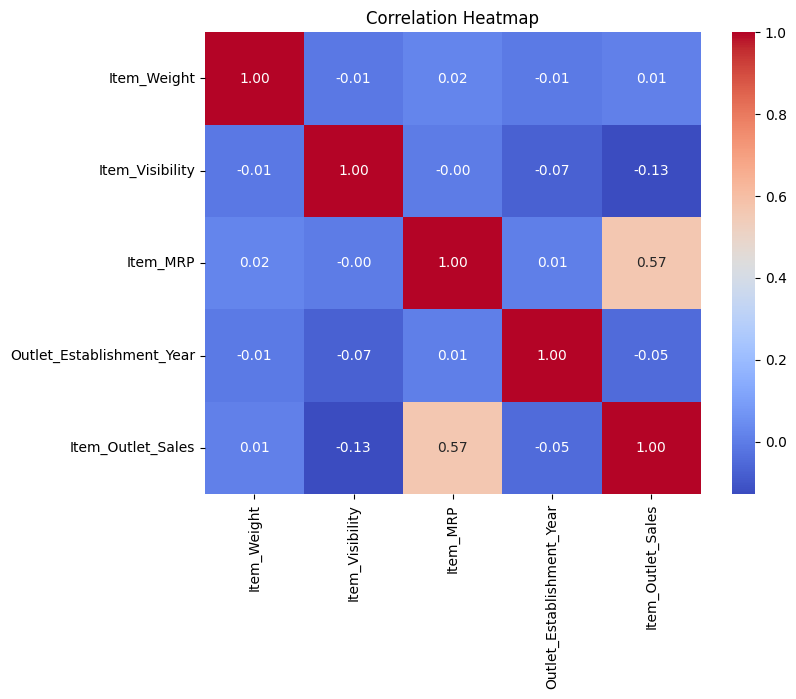

In [120]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Multi-Variate Analysis**

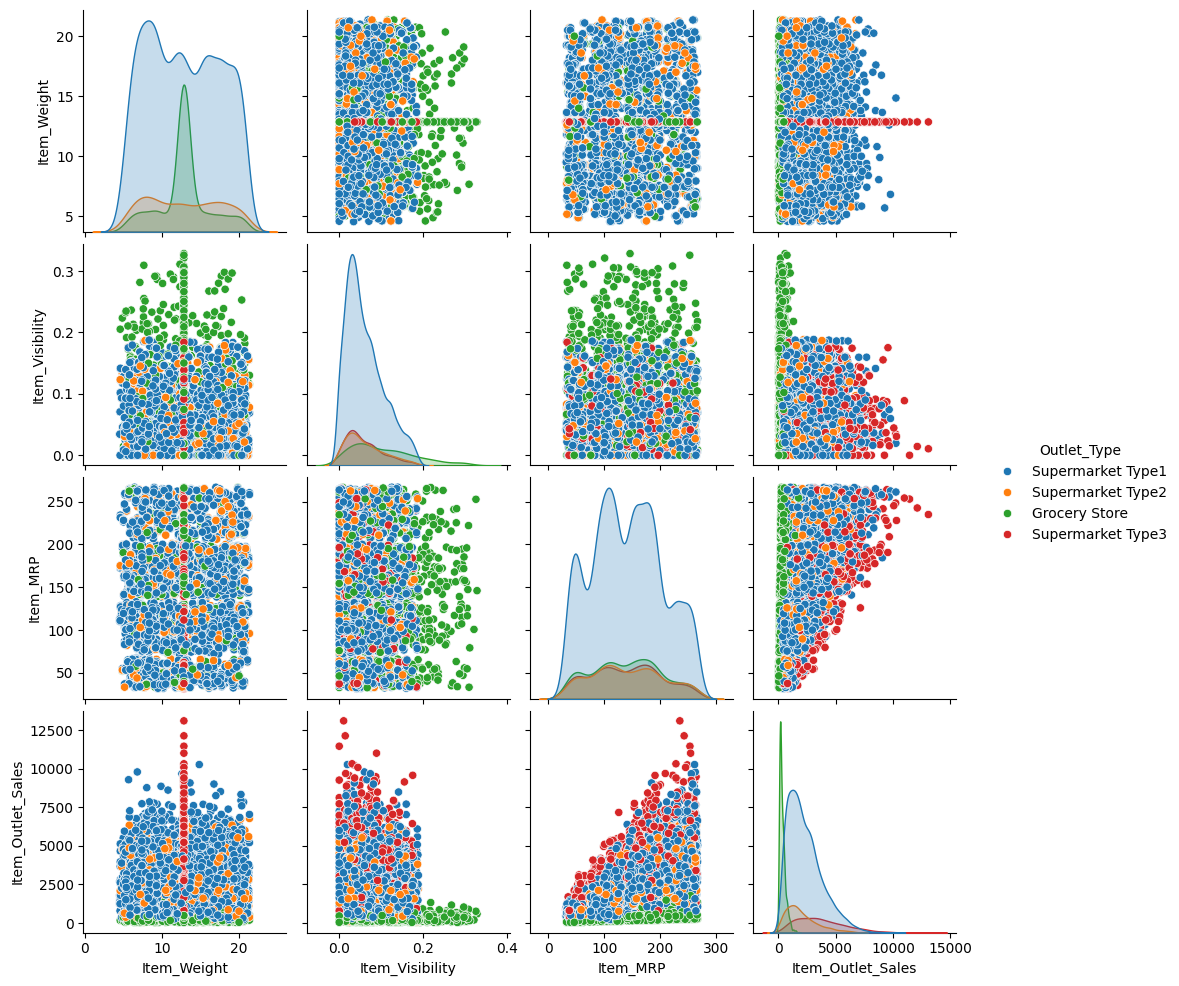

In [122]:
sns.pairplot(df, vars=["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"], hue="Outlet_Type")
plt.show()

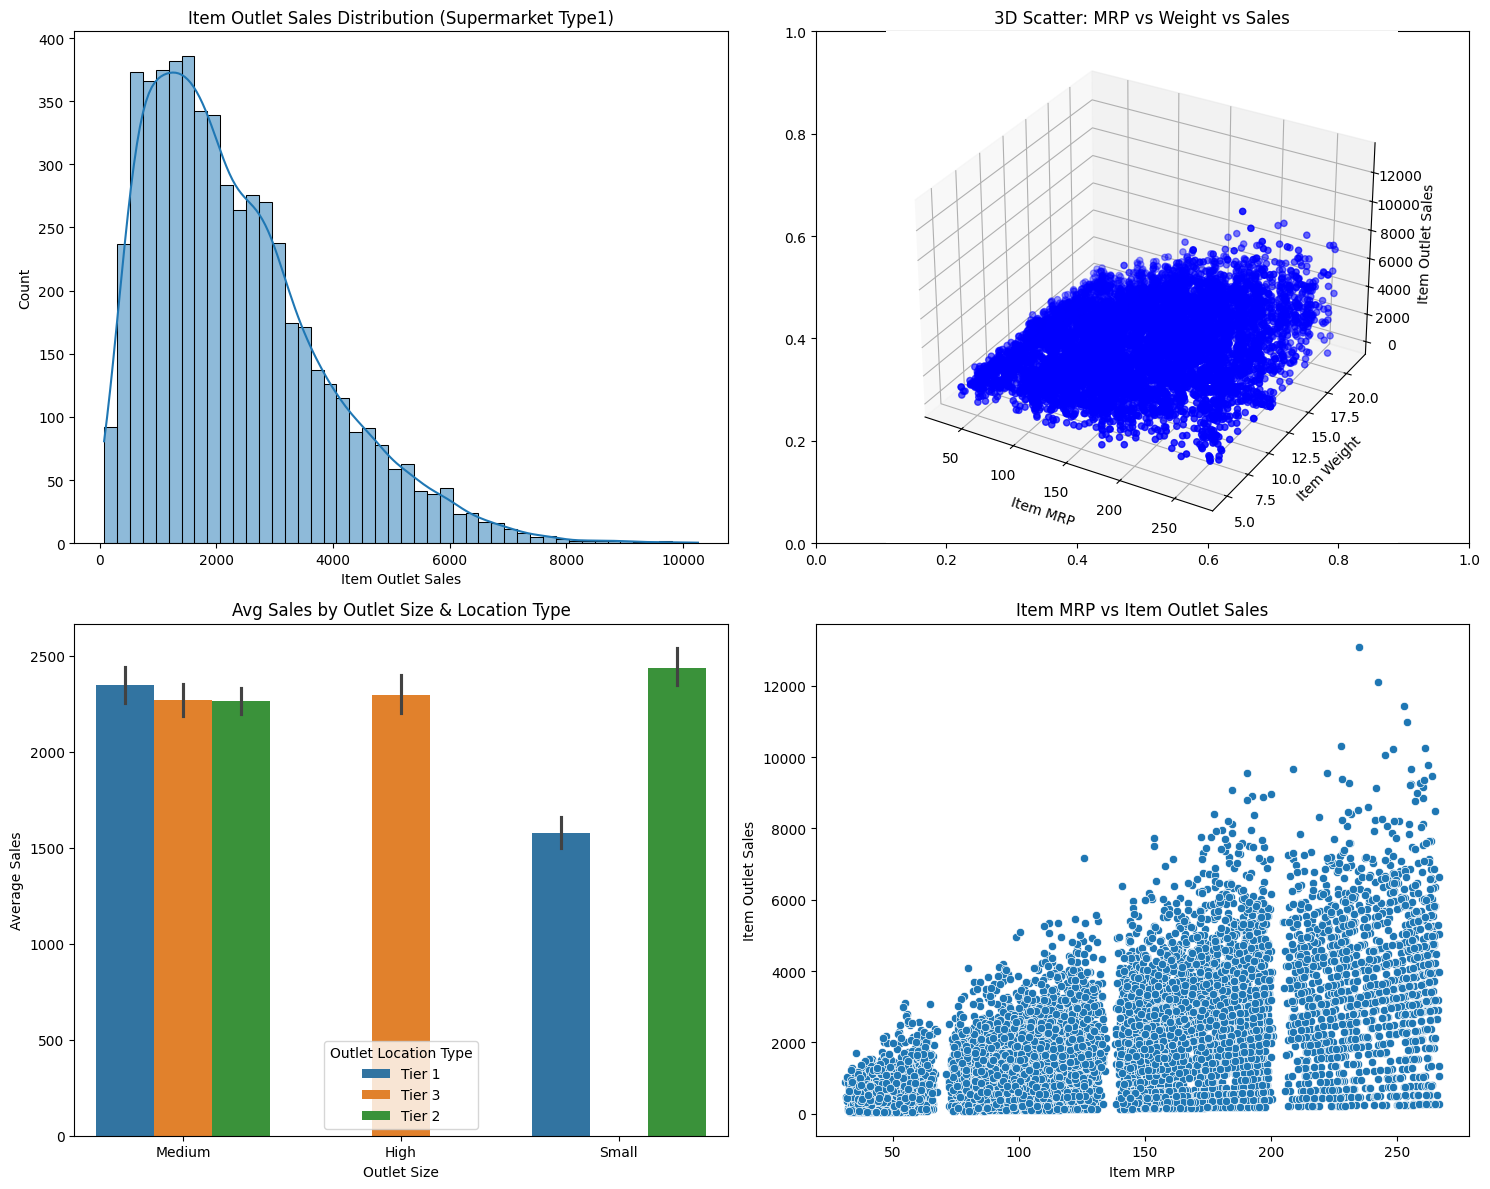

In [131]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Facet Grid (For simplicity, we plot only one Outlet_Type)
sns.histplot(df[df["Outlet_Type"] == "Supermarket Type1"]["Item_Outlet_Sales"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Item Outlet Sales Distribution (Supermarket Type1)")
axes[0, 0].set_xlabel("Item Outlet Sales")
axes[0, 0].set_ylabel("Count")

# 3D Scatter Plot
ax3d = fig.add_subplot(2, 2, 2, projection='3d')
ax3d.scatter(df["Item_MRP"], df["Item_Weight"], df["Item_Outlet_Sales"], c='b', marker='o')
ax3d.set_xlabel("Item MRP")
ax3d.set_ylabel("Item Weight")
ax3d.set_zlabel("Item Outlet Sales")
ax3d.set_title("3D Scatter: MRP vs Weight vs Sales")

# Clustered Bar Chart
sns.barplot(data=df, x="Outlet_Size", y="Item_Outlet_Sales", hue="Outlet_Location_Type", estimator=np.mean, ax=axes[1, 0])
axes[1, 0].set_title("Avg Sales by Outlet Size & Location Type")
axes[1, 0].set_xlabel("Outlet Size")
axes[1, 0].set_ylabel("Average Sales")
axes[1, 0].legend(title="Outlet Location Type")

# Scatter Plot (Item MRP vs Sales)
sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales", ax=axes[1, 1])
axes[1, 1].set_title("Item MRP vs Item Outlet Sales")
axes[1, 1].set_xlabel("Item MRP")
axes[1, 1].set_ylabel("Item Outlet Sales")

# Adjust layout
plt.tight_layout()
plt.show()

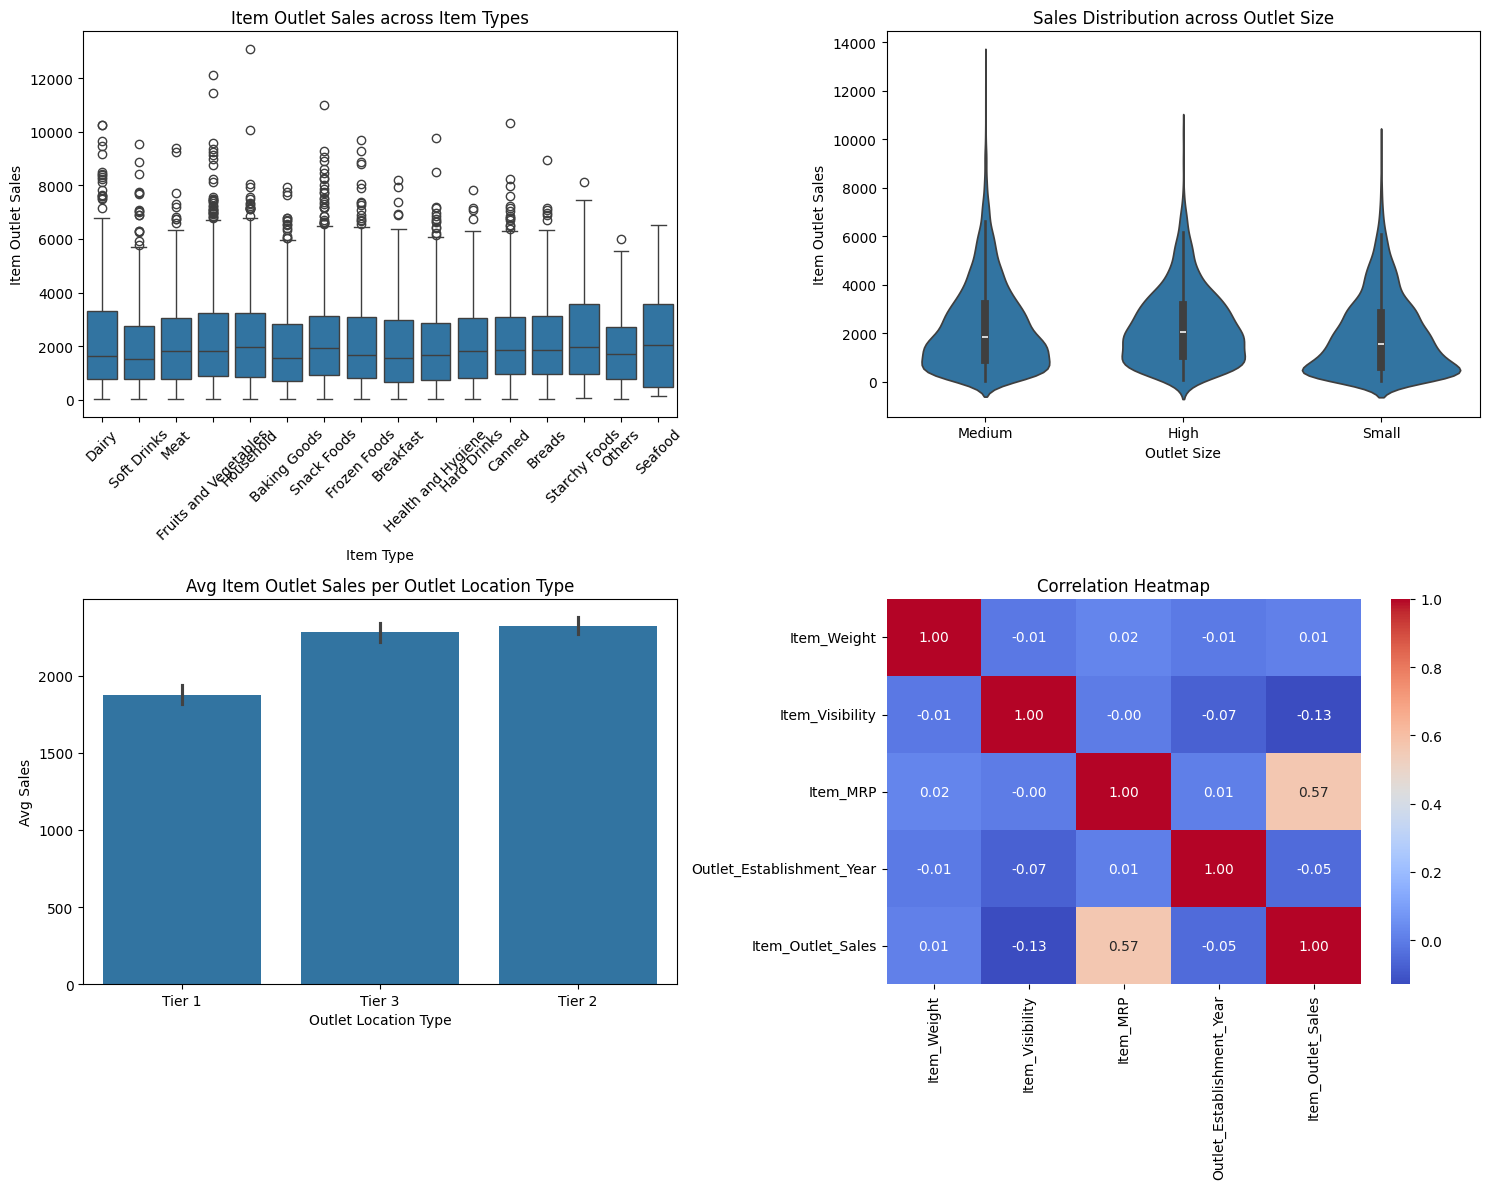

In [134]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Box Plot: Item Type vs Item Outlet Sales
sns.boxplot(data=df, x="Item_Type", y="Item_Outlet_Sales", ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_title("Item Outlet Sales across Item Types")
axes[0, 0].set_xlabel("Item Type")
axes[0, 0].set_ylabel("Item Outlet Sales")

# Violin Plot: Outlet Size vs Item Outlet Sales
sns.violinplot(data=df, x="Outlet_Size", y="Item_Outlet_Sales", ax=axes[0, 1])
axes[0, 1].set_title("Sales Distribution across Outlet Size")
axes[0, 1].set_xlabel("Outlet Size")
axes[0, 1].set_ylabel("Item Outlet Sales")

# Bar Plot: Average Item Outlet Sales per Outlet Location Type
sns.barplot(data=df, x="Outlet_Location_Type", y="Item_Outlet_Sales", estimator=np.mean, ax=axes[1, 0])
axes[1, 0].set_title("Avg Item Outlet Sales per Outlet Location Type")
axes[1, 0].set_xlabel("Outlet Location Type")
axes[1, 0].set_ylabel("Avg Sales")

# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap")

# Adjust layout
plt.tight_layout()
plt.show()

# **Model SELECTION**

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
scaler = MinMaxScaler()

# 3️⃣ Fit on Training Data & Transform Both
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 

In [147]:
# Define the models
lr = LinearRegression()
la = Lasso(random_state=42)
ri = Ridge(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
svr = SVR()

# Add models to list
model_list = [lr, la, ri, dt, xgb, rf, gb,svr]
model_name = ["Linear Regression", "Lasso", "Ridge", "Decision Tree Regressor", "XGB Regressor", 
              "Random Forest Regressor", "Gradient Boosting Regressor","SVR"]

Model Name: Linear Regression
RMSE: 1092.8631, R2 Score: 0.5671, Adjusted R2 Score: 0.5601


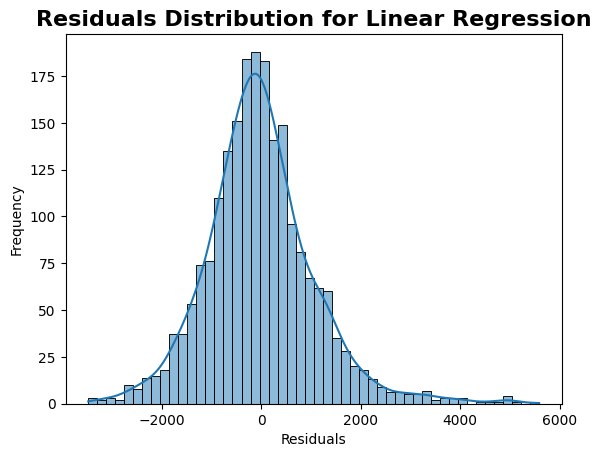

Model Name: Lasso
RMSE: 1091.1134, R2 Score: 0.5685, Adjusted R2 Score: 0.5615


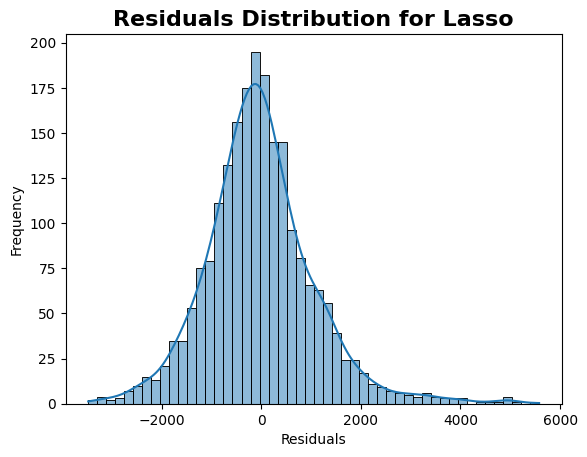

Model Name: Ridge
RMSE: 1092.7698, R2 Score: 0.5672, Adjusted R2 Score: 0.5602


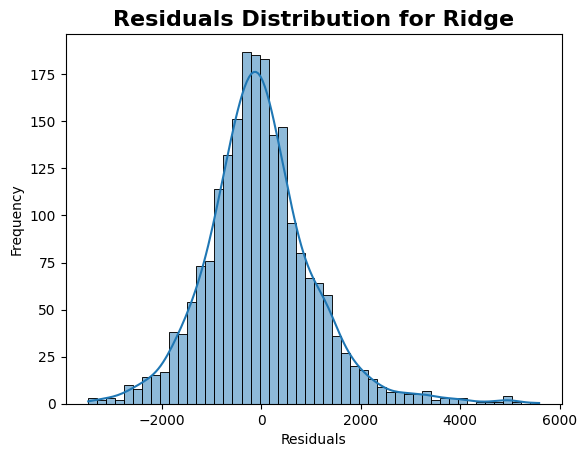

Model Name: Decision Tree Regressor
RMSE: 1568.5073, R2 Score: 0.1083, Adjusted R2 Score: 0.0938


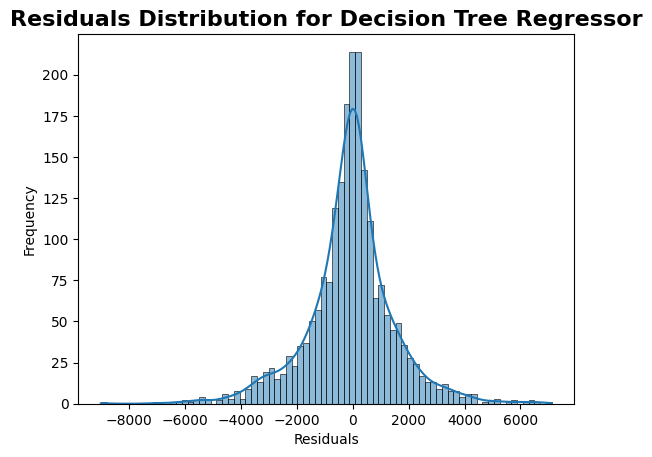

Model Name: XGB Regressor
RMSE: 1179.6327, R2 Score: 0.4956, Adjusted R2 Score: 0.4875


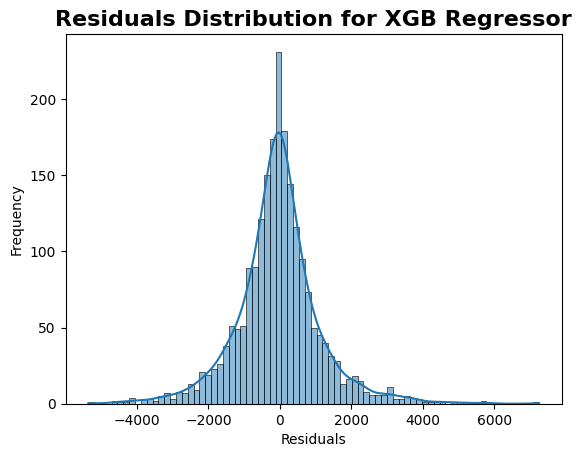

Model Name: Random Forest Regressor
RMSE: 1109.0014, R2 Score: 0.5542, Adjusted R2 Score: 0.5470


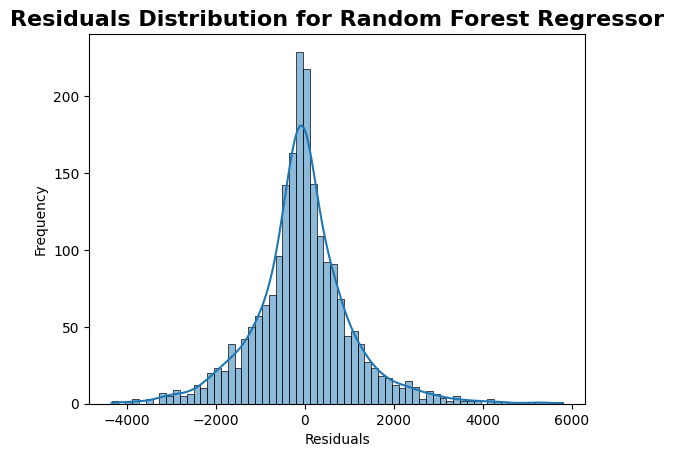

Model Name: Gradient Boosting Regressor
RMSE: 1056.7888, R2 Score: 0.5952, Adjusted R2 Score: 0.5886


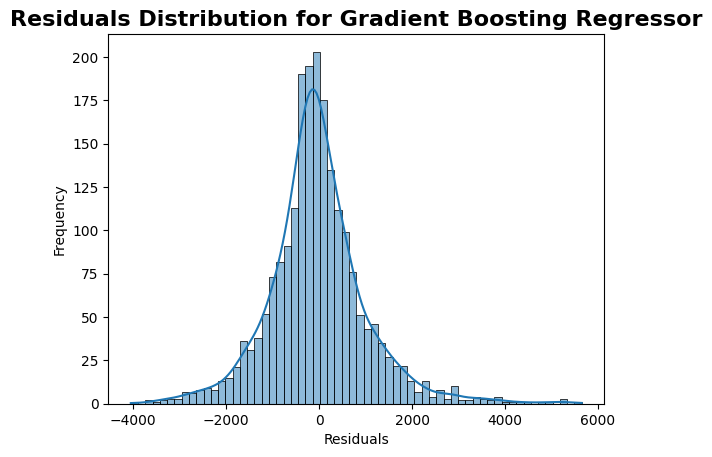

Model Name: SVR
RMSE: 1681.6806, R2 Score: -0.0250, Adjusted R2 Score: -0.0417


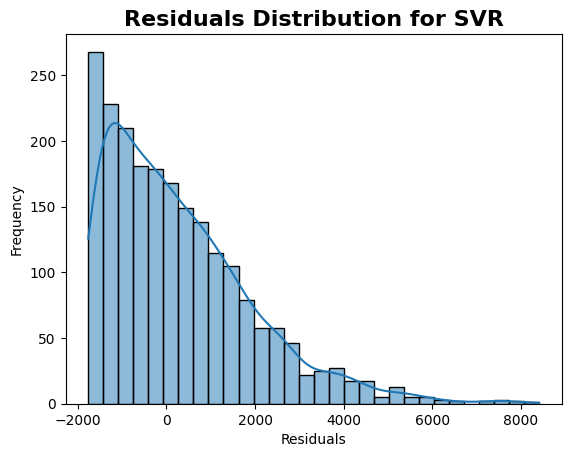

In [148]:
# Loop through each model
for name, model in zip(model_name, model_list):
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))  
    n = len(y_test)  
    p = X_train.shape[1]  
    r2 = r2_score(y_test, y_pred)  
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

    # Print the model results
    print(f"Model Name: {name}")
    print(f"RMSE: {RMSE:.4f}, R2 Score: {r2:.4f}, Adjusted R2 Score: {adjusted_r2:.4f}")

    # Plot the residuals
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True)
    plt.title(f"Residuals Distribution for {name}", fontsize=16, fontweight='bold')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

# **Cross Validation**

**With Gradient Boosting**

In [149]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation MSE:", -scores.mean())  # Convert negative MSE to positive
print("Cross-validation RMSE:", np.sqrt(-scores.mean()))

Cross-validation MSE: 1207766.4709929072
Cross-validation RMSE: 1098.9842906033311


**XGBRegressor**

In [150]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation MSE:", -scores.mean())  # Convert negative MSE to positive
print("Cross-validation RMSE:", np.sqrt(-scores.mean()))

Cross-validation MSE: 1450582.8774517667
Cross-validation RMSE: 1204.4014602497653


# **Hyper-parameter Tunning**

In [151]:
# Define base model
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5, 6],  # Tree depth
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of data used per tree
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 3, 5],  # Min samples per leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Features considered for splitting
}

In [154]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=gbr, param_distributions=param_grid,
    n_iter=30, cv=5, scoring='neg_mean_squared_error', 
    n_jobs=-1, verbose=2, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters from Randomized Search:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters from Randomized Search: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.05}


In [155]:
# Use best params from Randomized Search
best_params = random_search.best_params_

# Create a smaller search grid around the best params
param_grid_refined = {
    'learning_rate': [best_params['learning_rate'] * 0.5, best_params['learning_rate'], best_params['learning_rate'] * 1.5],
    'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
    'n_estimators': [best_params['n_estimators'] - 100, best_params['n_estimators'], best_params['n_estimators'] + 100]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=gbr, param_grid=param_grid_refined,
    cv=5, scoring='neg_mean_squared_error', 
    n_jobs=-1, verbose=2
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters from Grid Search:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters from Grid Search: {'learning_rate': 0.025, 'max_depth': 4, 'n_estimators': 200}


In [156]:
# Get best parameters from Grid Search
best_params = grid_search.best_params_

# Train final model
final_model = GradientBoostingRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Predict
y_pred = final_model.predict(X_test)


**Evaluation**

In [162]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f"MSE: {mse},  RMSE: {rmse}, R2_Score: {r2}")

MSE: 1116165.170798687,  RMSE: 1056.4871843986973, R2_Score: 0.5954424214611707


**Again Cross Validation**

In [159]:
gbr = GradientBoostingRegressor(**best_params, random_state=42)

scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation MSE:", -scores.mean())  # Convert negative MSE to positive
print("Cross-validation RMSE:", np.sqrt(-scores.mean()))

Cross-validation MSE: 1200620.1600422177
Cross-validation RMSE: 1095.7281414850208


**After Running Trail Gradient Boosting Perform best in this Dataset With below mention Evaluation:**

Model Name: Gradient Boosting Regressor

- RMSE: 1056.7888
- R2 Score: 0.5952
- Cross-validation RMSE: 1098.9842

**After Hyper-Parameter Tunning score improves**

Model Name: Gradient Boosting Regressor

- RMSE: 1056.4871
- R2_Score: 0.5954
- Cross-validation RMSE: 1095.7281